In [27]:
import warnings
warnings.filterwarnings('ignore')


/home/james/anaconda3/envs/kernelcnp/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
import pandas as pd
import numpy as np
from cnp.experiment import WorkingDirectory, generate_root
import os
import matplotlib.pyplot as plt
import matplotlib


In [38]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 

In [39]:
models = ["GNP", "AGNP", "convGNP", "TEGNP",  "MeanTEGNP", "MeanTEAGNP" ]
colours = ["tab:blue", "tab:orange", "tab:purple", "tab:olive", "tab:red", "tab:cyan"]
datas = ["eq", "matern", "noisy-mixture", "sawtooth"]
markers = ["o", "x", "s"]
covs = ["innerprod-homo", "kvv-homo", "meanfield"]
seeds = ['0']



In [40]:
experiments = []
row_labels = []
column_labels = []
for m, colour in zip(models, colours):
    for d in datas:
        for s in seeds:
            for c, marker in zip(covs, markers):          
                experiment_name = os.path.join('_experiments', 
                                               f'{d}',
                                               'models', 
                                               f'{m}',
                                               f'{c}',
                                               f'{s}')

                wd = WorkingDirectory(root=experiment_name)
                experiments.append((d, m, c, s, colour, marker, wd.root ))

for m in models:
    for c in covs:
        row_labels.append(f'{m}-{c}')

for d in datas:
    column_labels.append(f'{d}')
    column_labels.append(f'{d}-error')
    column_labels.append(f'{d}-iterations')

column_labels.append("marker")
column_labels.append("colour")


# Create an empty dataframe
df = pd.DataFrame(index=row_labels, columns=column_labels)

Root: _experiments/eq/models/GNP/innerprod-homo/0
Root: _experiments/eq/models/GNP/kvv-homo/0
Root: _experiments/eq/models/GNP/meanfield/0
Root: _experiments/matern/models/GNP/innerprod-homo/0
Root: _experiments/matern/models/GNP/kvv-homo/0
Root: _experiments/matern/models/GNP/meanfield/0
Root: _experiments/noisy-mixture/models/GNP/innerprod-homo/0
Root: _experiments/noisy-mixture/models/GNP/kvv-homo/0
Root: _experiments/noisy-mixture/models/GNP/meanfield/0
Root: _experiments/sawtooth/models/GNP/innerprod-homo/0
Root: _experiments/sawtooth/models/GNP/kvv-homo/0
Root: _experiments/sawtooth/models/GNP/meanfield/0
Root: _experiments/eq/models/AGNP/innerprod-homo/0
Root: _experiments/eq/models/AGNP/kvv-homo/0
Root: _experiments/eq/models/AGNP/meanfield/0
Root: _experiments/matern/models/AGNP/innerprod-homo/0
Root: _experiments/matern/models/AGNP/kvv-homo/0
Root: _experiments/matern/models/AGNP/meanfield/0
Root: _experiments/noisy-mixture/models/AGNP/innerprod-homo/0
Root: _experiments/nois

In [49]:
for e in experiments:
    d, m, c, s, colour, marker, r = e
    row_label = f'{m}-{c}'

    experiment_name = os.path.join('_experiments', 
                                               f'{d}',
                                               'models', 
                                               f'{m}',
                                               f'{c}',
                                               f'{s}')

    wd = WorkingDirectory(root=experiment_name)
    if os.path.isfile(os.path.join(wd.root, 'test_log_likelihood.txt')):
        mean = -np.loadtxt(wd.file('test_log_likelihood.txt', 
                                exists=True))
        error = np.loadtxt(wd.file('test_log_likelihood_standard_error.txt',
                                exists=True))/np.sqrt(2048)
        df.at[row_label, f'{d}'] = mean
        df.at[row_label, f'{d}-error'] = error
        df.at[row_label, 'colour'] = colour
        df.at[row_label, 'marker'] = marker
    else:
        print(f'No results {wd.root}')
    
    iteration = np.loadtxt(wd.file('last_epoch.txt',
                                exists=True))
    df.at[row_label, f'{d}-iterations'] = iteration



Root: _experiments/eq/models/GNP/innerprod-homo/0
Root: _experiments/eq/models/GNP/kvv-homo/0
Root: _experiments/eq/models/GNP/meanfield/0
Root: _experiments/matern/models/GNP/innerprod-homo/0
Root: _experiments/matern/models/GNP/kvv-homo/0
Root: _experiments/matern/models/GNP/meanfield/0
Root: _experiments/noisy-mixture/models/GNP/innerprod-homo/0
Root: _experiments/noisy-mixture/models/GNP/kvv-homo/0
Root: _experiments/noisy-mixture/models/GNP/meanfield/0
Root: _experiments/sawtooth/models/GNP/innerprod-homo/0
Root: _experiments/sawtooth/models/GNP/kvv-homo/0
Root: _experiments/sawtooth/models/GNP/meanfield/0
Root: _experiments/eq/models/AGNP/innerprod-homo/0
Root: _experiments/eq/models/AGNP/kvv-homo/0
Root: _experiments/eq/models/AGNP/meanfield/0
Root: _experiments/matern/models/AGNP/innerprod-homo/0
Root: _experiments/matern/models/AGNP/kvv-homo/0
Root: _experiments/matern/models/AGNP/meanfield/0
Root: _experiments/noisy-mixture/models/AGNP/innerprod-homo/0
Root: _experiments/nois

In [50]:
df

,eq,eq-error,eq-iterations,matern,matern-error,matern-iterations,noisy-mixture,noisy-mixture-error,noisy-mixture-iterations,sawtooth,sawtooth-error,sawtooth-iterations,marker,colour
GNP-innerprod-homo,881.815683,14.705783,10001.0,362.863148,10.207307,10001.0,-332.88756,7.056718,10001.0,-347.602381,3.834271,10001.0,o,tab:blue
GNP-kvv-homo,926.888246,15.031867,10001.0,441.219968,10.979509,10001.0,-267.44821,7.576593,10001.0,-347.560557,3.833805,10001.0,x,tab:blue
GNP-meanfield,-42.513687,15.419755,10001.0,-587.167955,14.636377,10001.0,-1626.755339,22.36379,10001.0,-347.7876,3.837663,10001.0,s,tab:blue
AGNP-innerprod-homo,1239.703179,17.402251,10001.0,905.98514,15.322964,10001.0,535.049549,15.187861,10001.0,-348.828701,3.847681,10001.0,o,tab:orange
AGNP-kvv-homo,1229.602132,17.470577,10001.0,830.294735,14.810175,10001.0,491.125243,15.116028,10001.0,-348.871746,3.848182,10001.0,x,tab:orange
AGNP-meanfield,752.868546,20.57331,10001.0,370.778975,20.208818,10001.0,-210.55208,24.93529,10001.0,-348.454107,3.844171,10001.0,s,tab:orange
convGNP-innerprod-homo,1175.979773,17.886144,10001.0,822.687088,16.072508,10001.0,448.201813,19.785389,10001.0,1769.883293,36.361467,10001.0,o,tab:purple
convGNP-kvv-homo,1253.118217,17.66978,10001.0,898.874646,15.440546,10001.0,727.33646,17.233994,10001.0,3264.842159,46.61176,10001.0,x,tab:purple
convGNP-meanfield,859.610048,20.956335,10001.0,448.760631,20.229318,10001.0,6.424907,25.9659,10001.0,3014.82563,44.956045,10001.0,s,tab:purple
TEGNP-innerprod-homo,1112.538363,16.81776,10001.0,855.091258,14.830669,10001.0,492.604116,14.700473,10001.0,-347.938997,3.83822,10001.0,o,tab:olive


In [51]:
def plot_results(d, df):
    plt.xticks([])
    x = np.arange(len(df[d]))
    y = df[d]
    e = df[d + '-error']
    label = df.index
    colour = df['colour'].tolist()
    marker = df['marker'].tolist()
    for i in range(len(x)):
        plt.errorbar(x[i], y[i], e[i], marker=marker[i], color=colour[i], label=label[i])
    plt.legend( ncol=6 ,bbox_to_anchor=(1.3, 0))
    plt.title(d)
    plt.show()


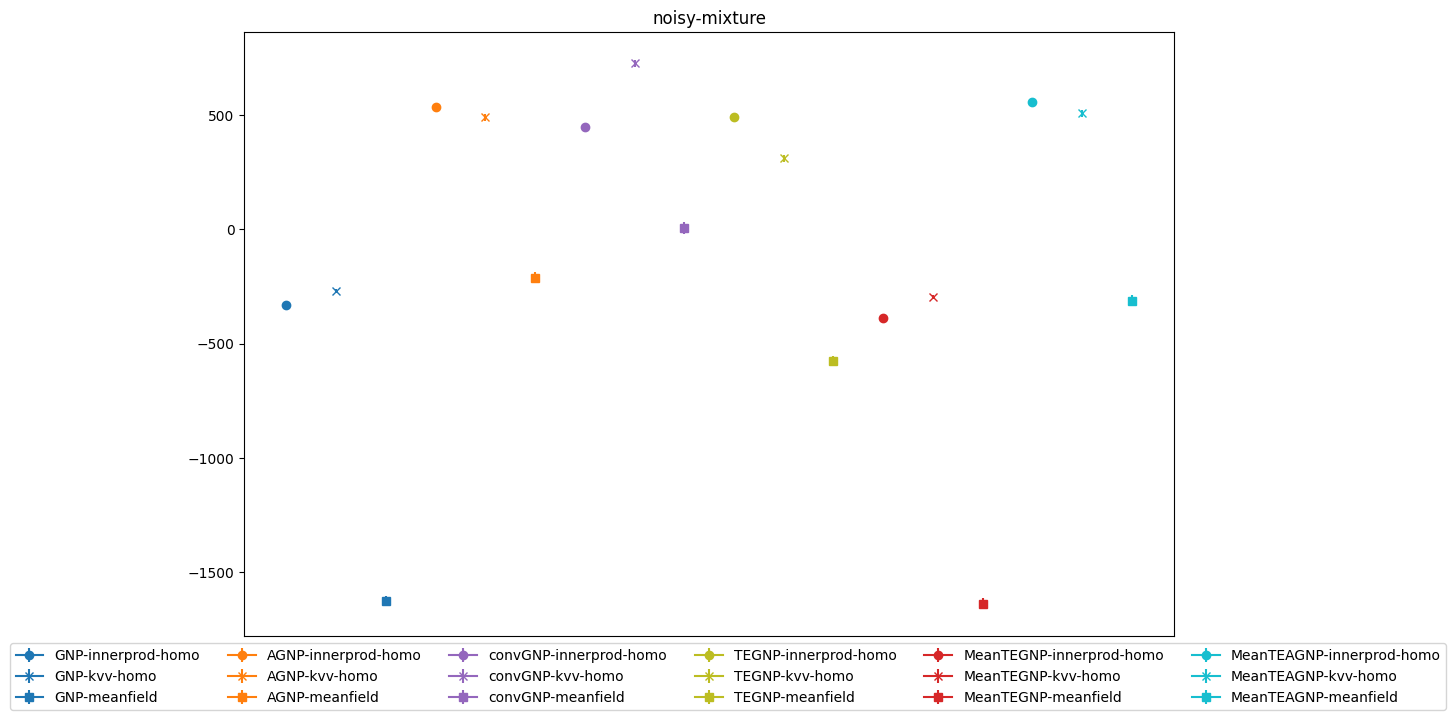

In [55]:
plot_results("noisy-mixture", df)